In [6]:
import cobra
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [7]:
cerevisiae = cobra.io.load_json_model('./modelos COBRA/iMM904.json')
cerevisiae

Name,iMM904
Memory address,0x07c35433b70
Number of metabolites,1226
Number of reactions,1577
Objective expression,-1.0*BIOMASS_SC5_notrace_reverse_93090 + 1.0*BIOMASS_SC5_notrace
Compartments,"cytosol, mitochondria, extracellular space, peroxisome/glyoxysome, endoplasmic reticulum, vacuole, nucleus, golgi apparatus"


In [8]:
cerevisiaeMod1 = cobra.io.load_json_model('./cerevisiaeMod1.json')
cerevisiaeMod1a = cobra.io.load_json_model('./cerevisiaeMod1a.json')
cerevisiaeMod2 = cobra.io.load_json_model('./cerevisiaeMod2.json')
cerevisiaeMod3 = cobra.io.load_json_model('./cerevisiaeMod3.json')

In [9]:
#print("Reactions")
#print("---------")
#for x in cerevisiaeMod1.reactions:
#    print("%s : %s \n lower: %s, upper: %s" % (x.id, x.reaction, x.lower_bound, x.upper_bound))

In [10]:
cerevisiaeMod1.objective = cerevisiaeMod1.add_boundary(cerevisiaeMod1.metabolites.but_c, type='demand')
cerevisiaeMod1a.objective = cerevisiaeMod1a.add_boundary(cerevisiaeMod1a.metabolites.but_c, type='demand')
cerevisiaeMod2.objective = cerevisiaeMod2.add_boundary(cerevisiaeMod2.metabolites.but_c, type='demand')
cerevisiaeMod3.objective = cerevisiaeMod3.add_boundary(cerevisiaeMod3.metabolites.but_c, type='demand')

In [12]:
cerevisiaeMod1.optimize()
cerevisiaeMod1.summary()

IN FLUXES     OUT FLUXES     OBJECTIVES
------------  -------------  --------------
glc__D_e  10  h_e     19.2   DM_but_c  7.48
o2_e       2  h2o_e   12.4
              but_c    7.48
              co2_e    6.54
              succ_e   5.88


In [13]:
cerevisiaeMod1a.optimize()
cerevisiaeMod1a.summary()

IN FLUXES     OUT FLUXES     OBJECTIVES
------------  -------------  --------------
glc__D_e  10  h_e     14.2   DM_but_c  8.95
o2_e       2  h2o_e   12.3
              co2_e   11
              but_c    8.95
              succ_e   2.63
              etoh_e   1.35


In [14]:
cerevisiaeMod2.optimize()
cerevisiaeMod2.summary()

IN FLUXES        OUT FLUXES    OBJECTIVES
---------------  ------------  --------------
glc__D_e  10     h2o_e  13.3   DM_but_c  11.7
o2_e       1.65  co2_e  13.3
                 h_e    11.7
                 but_c  11.7


In [15]:
cerevisiaeMod3.optimize()
cerevisiaeMod3.summary()

IN FLUXES     OUT FLUXES     OBJECTIVES
------------  -------------  --------------
glc__D_e  10  co2_e   14.1   DM_but_c  10.9
o2_e       2  h2o_e   12.9
              but_c   10.9
              h_e     10.9
              etoh_e   1.14


## The optmal flux for butyrate production is using the prescribed reactions: 

In [16]:
cerevisiaeMod1a.metabolites.but_c.summary()

PRODUCING REACTIONS -- Butyrate (n-C4:0) (but_c)
------------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  ---------------------------------------
100%    8.95  BCOAhydb  btcoa_c + h2o_c <=> but_c + coa_c + h_c

CONSUMING REACTIONS -- Butyrate (n-C4:0) (but_c)
------------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  ---------------------------------------
100%    8.95  DM_but_c  but_c -->


In [17]:
cerevisiaeMod1a.metabolites.btcoa_c.summary()

PRODUCING REACTIONS -- Butanoyl-CoA (btcoa_c)
---------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  ------------------------------------------
100%    8.95  ACOAD1b   b2coa_c + h_c + nadh_c <=> btcoa_c + nad_c

CONSUMING REACTIONS -- Butanoyl-CoA (btcoa_c)
---------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  ------------------------------------------
100%    8.95  BCOAhydb  btcoa_c + h2o_c <=> but_c + coa_c + h_c


In [18]:
cerevisiaeMod1a.metabolites.b2coa_c.summary()

PRODUCING REACTIONS -- Crotonoyl-CoA (b2coa_c)
----------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  ------------------------------------------
100%    8.95  HBCOAhydb  3hbcoa_c <=> b2coa_c + h2o_c

CONSUMING REACTIONS -- Crotonoyl-CoA (b2coa_c)
----------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  ------------------------------------------
100%    8.95  ACOAD1b    b2coa_c + h_c + nadh_c <=> btcoa_c + nad_c


# Optimal Biomass Production: 

In [20]:
cerevisiaeMod1.objective = 'BIOMASS_SC5_notrace' 
cerevisiaeMod1a.objective = 'BIOMASS_SC5_notrace' 
cerevisiaeMod2.objective = 'BIOMASS_SC5_notrace' 
cerevisiaeMod3.objective = 'BIOMASS_SC5_notrace' 

In [21]:
cerevisiaeMod1.optimize()
cerevisiaeMod1.summary()

IN FLUXES          OUT FLUXES        OBJECTIVES
-----------------  ----------------  ----------------------
glc__D_e  10       co2_e   17.9      BIOMASS_SC5_...  0.291
o2_e       2       etoh_e  15.7
nh4_e      1.63    h2o_e    5.68
pi_e       0.0576  h_e      1.54
so4_e      0.0225  ac_e     0.0709
                   for_e    0.00151


In [22]:
cerevisiaeMod1a.optimize()
cerevisiaeMod1a.summary()

IN FLUXES          OUT FLUXES        OBJECTIVES
-----------------  ----------------  ----------------------
glc__D_e  10       co2_e   17.9      BIOMASS_SC5_...  0.291
o2_e       2       etoh_e  15.7
nh4_e      1.63    h2o_e    5.68
pi_e       0.0576  h_e      1.54
so4_e      0.0225  ac_e     0.0709
                   for_e    0.00151


In [23]:
cerevisiaeMod2.optimize()
cerevisiaeMod2.summary()

IN FLUXES          OUT FLUXES        OBJECTIVES
-----------------  ----------------  --------------------
glc__D_e  10       co2_e   17.2      BIOMASS_SC5_...  0.3
o2_e       2       etoh_e  13.9
nh4_e      1.68    h2o_e    6.85
pi_e       0.0594  h_e      2.56
so4_e      0.0232  but_c    1.05
                   for_e    0.00155


In [24]:
cerevisiaeMod3.optimize()
cerevisiaeMod3.summary()

IN FLUXES          OUT FLUXES        OBJECTIVES
-----------------  ----------------  ----------------------
glc__D_e  10       co2_e   17.6      BIOMASS_SC5_...  0.293
o2_e       2       etoh_e  14.9
nh4_e      1.64    h2o_e    6.16
pi_e       0.0579  h_e      2
so4_e      0.0227  but_c    0.457
                   ac_e     0.0713
                   for_e    0.00152


# Multi-objective optimization

https://cobrapy.readthedocs.io/en/latest/constraints_objectives.html

Here the scalarization of the multi-objective problem where the biomass and butyrate production are maximized is solved: 

$$
\begin{equation*}
\begin{aligned}
& \underset{f}{\text{maximize}}
& &  biomass(f) +  \lambda \ but(f) \\
& \text{subject to}
& & Sf = 0 \\
&&& l_i \leq f_i \leq u_i, \; i = 1, \ldots, m.
\end{aligned}
\end{equation*}
$$

In the objective $biomass$ and $but$ are functions of the vector of flows $f$. The parameter $\lambda$ controls the tradeoff between the biomass and the production of butyrate. 



In [105]:
biomass = cerevisiaeMod1.reactions.BIOMASS_SC5_notrace.flux_expression
but1 = cerevisiaeMod1.reactions.DM_but_c.flux_expression
but1a = cerevisiaeMod1a.reactions.DM_but_c.flux_expression
but2 = cerevisiaeMod2.reactions.DM_but_c.flux_expression
but3 = cerevisiaeMod3.reactions.DM_but_c.flux_expression

In [254]:
# solution path:
lams = np.arange(0, 0.1, 0.001)
nlams = len(lams)

buts1 = np.repeat(0.0, nlams)
buts1a = np.repeat(0.0, nlams)
buts2 = np.repeat(0.0, nlams)
buts3 = np.repeat(0.0, nlams)

biomasses1 = np.repeat(0.0, nlams)
biomasses1a = np.repeat(0.0, nlams)
biomasses2 = np.repeat(0.0, nlams)
biomasses3 = np.repeat(0.0, nlams)


for i, lam in enumerate(lams):
    
    biomass_but1 = cerevisiaeMod1.problem.Objective(biomass + lam*but1,
    direction='max')
    biomass_but1a = cerevisiaeMod1a.problem.Objective(biomass + lam*but1a,
    direction='max')
    biomass_but2 = cerevisiaeMod2.problem.Objective(biomass + lam*but2,
    direction='max')
    biomass_but3 = cerevisiaeMod3.problem.Objective(biomass + lam*but3,
    direction='max')
    
    cerevisiaeMod1.objective = biomass_but1
    cerevisiaeMod1a.objective = biomass_but1a
    cerevisiaeMod2.objective = biomass_but2
    cerevisiaeMod3.objective = biomass_but3
    
    solution1 = cerevisiaeMod1.optimize(objective_sense=None)
    solution1a = cerevisiaeMod1a.optimize(objective_sense=None)
    solution2 = cerevisiaeMod2.optimize(objective_sense=None)
    solution3 = cerevisiaeMod3.optimize(objective_sense=None)
    
    buts1[i] = solution1.fluxes.DM_but_c
    buts1a[i] = solution1a.fluxes.DM_but_c
    buts2[i] = solution2.fluxes.DM_but_c
    buts3[i] = solution3.fluxes.DM_but_c
    
    biomasses1[i] = solution1.fluxes.BIOMASS_SC5_notrace
    biomasses1a[i] = solution1a.fluxes.BIOMASS_SC5_notrace
    biomasses2[i] = solution2.fluxes.BIOMASS_SC5_notrace
    biomasses3[i] = solution3.fluxes.BIOMASS_SC5_notrace
    
    

## Some plots:

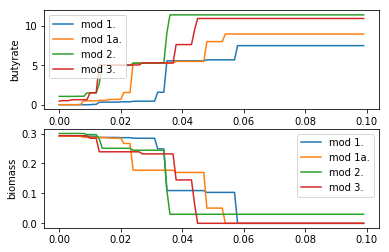

In [255]:
plt.subplot(2, 1, 1)
plt.plot(lams, buts1, label = 'mod 1.')
plt.plot(lams, buts1a, label = 'mod 1a.')
plt.plot(lams, buts2, label = 'mod 2.')
plt.plot(lams, buts3, label = 'mod 3.')
plt.ylabel('butyrate')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(lams, biomasses1, label = 'mod 1.')
plt.plot(lams, biomasses1a, label = 'mod 1a.')
plt.plot(lams, biomasses2, label = 'mod 2.')
plt.plot(lams, biomasses3, label = 'mod 3.')
plt.ylabel('biomass')
plt.legend()

plt.show()

### Model 2 is consistenly better:

The butyrate production is higher for any fixed biomass produciton. 

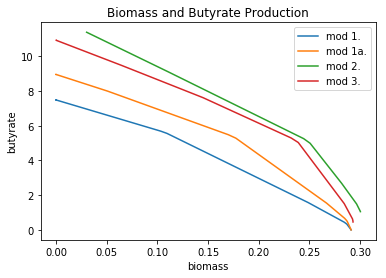

In [253]:
plt.plot(biomasses1, buts1, label = 'mod 1.')
plt.plot(biomasses1a, buts1a, label = 'mod 1a.')
plt.plot(biomasses2, buts2, label = 'mod 2.')
plt.plot(biomasses3, buts3, label = 'mod 3.')

plt.title('Biomass and Butyrate Production')
plt.xlabel('biomass')
plt.ylabel('butyrate')
plt.legend()
plt.show()

## Butyrate consumption for biomass in models 2 and 3

In [237]:
lam = 0.02

but2 = cerevisiaeMod2.reactions.DM_but_c.flux_expression
but3 = cerevisiaeMod3.reactions.DM_but_c.flux_expression

biomass_but2 = cerevisiaeMod2.problem.Objective(biomass + lam*but2,
    direction='max')
biomass_but3 = cerevisiaeMod3.problem.Objective(biomass + lam*but3,
    direction='max')

cerevisiaeMod2.objective = biomass_but2
cerevisiaeMod3.objective = biomass_but3

In [238]:
solution2 = cerevisiaeMod2.optimize(objective_sense=None)
solution3 = cerevisiaeMod3.optimize(objective_sense=None)

In [239]:
cerevisiaeMod2.summary()

IN FLUXES          OUT FLUXES     OBJECTIVES
-----------------  -------------  -----------------------
glc__D_e  10       h_e     19.9   BIOMASS_SC5_...  0.251
o2_e       2       h2o_e   13.6   DM_but_c         0.0997
nh4_e      1.4     succ_e   6.82
pi_e       0.0496  but_c    4.99
so4_e      0.0194  co2_e    3.76


In [240]:
cerevisiaeMod3.summary()

IN FLUXES          OUT FLUXES       OBJECTIVES
-----------------  ---------------  ----------------------
glc__D_e  10       h_e     20       BIOMASS_SC5_...  0.239
o2_e       2       h2o_e   13.5     DM_but_c         0.101
nh4_e      1.34    succ_e   6.87
pi_e       0.0473  but_c    5.03
so4_e      0.0185  co2_e    3.78
                   etoh_e   0.0137


In [241]:
cerevisiaeMod2.metabolites.but_c.summary()

PRODUCING REACTIONS -- Butyrate (n-C4:0) (but_c)
------------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  -------------------------------------------------
100%    4.99  FACOAL40ib  atp_c + but_c + coa_c <=> amp_c + btcoa_c + ppi_c

CONSUMING REACTIONS -- Butyrate (n-C4:0) (but_c)
------------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  -------------------------------------------------
100%    4.99  DM_but_c    but_c -->


In [242]:
cerevisiaeMod2.metabolites.btcoa_c.summary()

PRODUCING REACTIONS -- Butanoyl-CoA (btcoa_c)
---------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  -------------------------------------------------
100%    4.99  ACOAD1b     b2coa_c + h_c + nadh_c <=> btcoa_c + nad_c

CONSUMING REACTIONS -- Butanoyl-CoA (btcoa_c)
---------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  -------------------------------------------------
100%    4.99  FACOAL40ib  atp_c + but_c + coa_c <=> amp_c + btcoa_c + ppi_c


In [243]:
cerevisiaeMod2.metabolites.b2coa_c.summary()

PRODUCING REACTIONS -- Crotonoyl-CoA (b2coa_c)
----------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  ------------------------------------------
100%    4.99  HBCOAhydb  3hbcoa_c <=> b2coa_c + h2o_c

CONSUMING REACTIONS -- Crotonoyl-CoA (b2coa_c)
----------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  ------------------------------------------
100%    4.99  ACOAD1b    b2coa_c + h_c + nadh_c <=> btcoa_c + nad_c


In [244]:
cerevisiaeMod2.metabolites.get_by_id('3hbcoa_c').summary()

PRODUCING REACTIONS -- (R)-3-Hydroxybutyryl-CoA (3hbcoa_c)
----------------------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  -------------------------------------------
100%    4.99  AvAARb     aacoa_c + h_c + nadh_c <=> 3hbcoa_c + nad_c

CONSUMING REACTIONS -- (R)-3-Hydroxybutyryl-CoA (3hbcoa_c)
----------------------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  -------------------------------------------
100%    4.99  HBCOAhydb  3hbcoa_c <=> b2coa_c + h2o_c


In [245]:
cerevisiaeMod2.metabolites.aacoa_c.summary()

PRODUCING REACTIONS -- Acetoacetyl-CoA (aacoa_c)
------------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  --------------------------------------------------
58%     2.89  HMGCOAS   coa_c + h_c + hmgcoa_c <=> aacoa_c + accoa_c + ...
42%     2.1   ACACT1b   2.0 accoa_c <=> aacoa_c + coa_c

CONSUMING REACTIONS -- Acetoacetyl-CoA (aacoa_c)
------------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  --------------------------------------------------
100%    4.99  AvAARb    aacoa_c + h_c + nadh_c <=> 3hbcoa_c + nad_c


In [246]:
cerevisiaeMod2.metabolites.accoa_c.summary()

PRODUCING REACTIONS -- Acetyl-CoA (accoa_c)
-------------------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
65%  2.89    HMGCOAS     coa_c + h_c + hmgcoa_c <=> aacoa_c + accoa_c + ...
35%  1.55    ACS         ac_c + atp_c + coa_c --> accoa_c + amp_c + ppi_c

CONSUMING REACTIONS -- Acetyl-CoA (accoa_c)
-------------------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
94%  4.19    ACACT1b     2.0 accoa_c <=> aacoa_c + coa_c
2%   0.0997  ACCOAC      accoa_c + atp_c + hco3_c <=> adp_c + h_c + malc...
2%   0.0743  IPPS        3mob_c + accoa_c + h2o_c --> 3c3hmp_c + coa_c +...
1%   0.061   HSERTA      accoa_c + hom__L_c <=> achms_c + coa_c
0%   0.014   FAS80COA_L  accoa_c + 9.0 h_c + 3.0 malcoa_c + 6.0 nadph_c ...
